In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load in Data from CSV

In [52]:
df = pd.read_csv('/home/sabsr3/Rotations/ADCC/ADCC-Project/Data/basic_model_synthetic_data.csv')

Extract Data

In [56]:
# dataframe for mu=20 and 1% noise

df1 = df.loc[(df['mu'] == 20) & (df['noise level'] == 0.1) & (df['t'].isin([0.0, 1.0]))]
print(df1)

       Unnamed: 0    t    mu         gamma  noise level         A         R  \
1980         1980  0.0  20.0  1.000000e+00          0.1  0.970232  0.000000   
1990         1990  1.0  20.0  1.000000e+00          0.1  1.098599  0.000519   
1991         1991  0.0  20.0  1.000000e+00          0.1  1.003838  0.000000   
2001         2001  1.0  20.0  1.000000e+00          0.1  0.956999  0.000503   
2002         2002  0.0  20.0  1.000000e+00          0.1  0.928463  0.000000   
...           ...  ...   ...           ...          ...       ...       ...   
19667       19667  1.0  20.0  1.000000e-08          0.1  0.974413  0.954410   
19668       19668  0.0  20.0  1.000000e-08          0.1  1.065982  0.000000   
19678       19678  1.0  20.0  1.000000e-08          0.1  1.083954  1.010649   
19679       19679  0.0  20.0  1.000000e-08          0.1  0.971450  0.000000   
19689       19689  1.0  20.0  1.000000e-08          0.1  1.023153  1.032646   

              S         C  
1980   1.084078  0.0000

In [80]:
gamma_vals = [1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8] 
tumour_kill = []
df_kpercent = pd.DataFrame(columns=['gamma', 'kill percentage'])
for gamma in gamma_vals:
    data = df1.loc[df1['gamma'] == gamma]
    S_vals = data['S'].values
    for i in np.arange(0, 19, 2):
        kill_percent = 1 - (S_vals[i + 1]/S_vals[i])
        df_kpercent = df_kpercent.append({'gamma' : gamma,
                                          'kill percentage' : kill_percent}, ignore_index=True)
    
max_vals = []
min_vals = []
mean_vals = []

for gamma in gamma_vals:
    gamma_data = df_kpercent.loc[df_kpercent['gamma'] == gamma].values
    print(gamma_data.mean())
    max_vals.append(gamma_data.max())
    min_vals.append(gamma_data.min())
    mean_vals.append(gamma_data.mean())

0.49872260057384804
0.055605627699788426
0.030843360373336726
0.12978711055228845
0.21368853525105544
0.24270352427804953
0.24364356180990057
0.23252243872224052
0.24096091409006132


(0.0, -20.0)

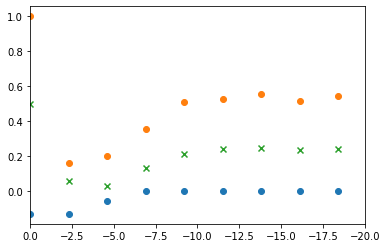

In [83]:
fig, ax = plt.subplots()

ax.scatter(np.log(gamma_vals), min_vals)
ax.scatter(np.log(gamma_vals), max_vals)
ax.scatter(np.log(gamma_vals), mean_vals, marker = 'x')
ax.set_xlim([0, -20])